<a href="https://colab.research.google.com/github/deepjyotisaha85/eva4/blob/master/session8/S8_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
workingdir = '/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 8'
sys.path.append(workingdir)

In [0]:
%matplotlib inline
import torch
from utils import datapreparation
from utils import display
from model import dnn
from model import resnet
from utils import training
from utils import evaluate

In [0]:
classes, trainloader, testloader = datapreparation.load()


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shape: torch.Size([128, 3, 32, 32])
  cat truck truck   cat   cat


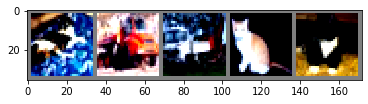

In [0]:
display.show_random_images(trainloader, classes)

In [0]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = resnet.ResNet18()
model = net.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

In [0]:
EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    training.train_model(model, device, trainloader, optimizer, criterion, epoch)
    training.test_model(model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.8576027154922485 Batch_id=390 Accuracy=53.90: 100%|██████████| 391/391 [03:14<00:00,  2.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 6704/10000 (67.04%)

EPOCH: 2


Loss=0.7019782662391663 Batch_id=390 Accuracy=73.97: 100%|██████████| 391/391 [03:14<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7428/10000 (74.28%)

EPOCH: 3


Loss=0.4769296646118164 Batch_id=390 Accuracy=82.34: 100%|██████████| 391/391 [03:14<00:00,  2.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7634/10000 (76.34%)

EPOCH: 4


Loss=0.27576321363449097 Batch_id=390 Accuracy=87.95: 100%|██████████| 391/391 [03:15<00:00,  2.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7928/10000 (79.28%)

EPOCH: 5


Loss=0.23279309272766113 Batch_id=390 Accuracy=91.60: 100%|██████████| 391/391 [03:15<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7831/10000 (78.31%)

EPOCH: 6


Loss=0.2747240662574768 Batch_id=390 Accuracy=94.44: 100%|██████████| 391/391 [03:15<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7853/10000 (78.53%)

EPOCH: 7


Loss=0.07601822912693024 Batch_id=390 Accuracy=96.23: 100%|██████████| 391/391 [03:14<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7974/10000 (79.74%)

EPOCH: 8


Loss=0.08377382159233093 Batch_id=390 Accuracy=97.49: 100%|██████████| 391/391 [03:14<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 8010/10000 (80.10%)

EPOCH: 9


Loss=0.08127406239509583 Batch_id=390 Accuracy=98.39: 100%|██████████| 391/391 [03:14<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8182/10000 (81.82%)

EPOCH: 10


Loss=0.09351947158575058 Batch_id=390 Accuracy=98.84: 100%|██████████| 391/391 [03:15<00:00,  2.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 8157/10000 (81.57%)

EPOCH: 11


Loss=0.06133446842432022 Batch_id=390 Accuracy=99.20: 100%|██████████| 391/391 [03:15<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 8122/10000 (81.22%)

EPOCH: 12


Loss=0.03723066300153732 Batch_id=390 Accuracy=99.44: 100%|██████████| 391/391 [03:15<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 8291/10000 (82.91%)

EPOCH: 13


Loss=0.0029453099705278873 Batch_id=390 Accuracy=99.82: 100%|██████████| 391/391 [03:15<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8394/10000 (83.94%)

EPOCH: 14


Loss=0.007288926746696234 Batch_id=390 Accuracy=99.94: 100%|██████████| 391/391 [03:14<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8438/10000 (84.38%)

EPOCH: 15


Loss=0.00013484954251907766 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:14<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8471/10000 (84.71%)

EPOCH: 16


Loss=0.00048172473907470703 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:14<00:00,  2.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8475/10000 (84.75%)

EPOCH: 17


Loss=0.0001745700865285471 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:15<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8489/10000 (84.89%)

EPOCH: 18


Loss=0.0006879568099975586 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:14<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 8504/10000 (85.04%)

EPOCH: 19


Loss=0.00010683536675060168 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:14<00:00,  2.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 8510/10000 (85.10%)

EPOCH: 20


Loss=0.00010492801811778918 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:15<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8514/10000 (85.14%)

EPOCH: 21


Loss=8.167028136085719e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:15<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8510/10000 (85.10%)

EPOCH: 22


Loss=0.00016571283049415797 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:16<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8515/10000 (85.15%)

EPOCH: 23


Loss=0.00015131235704757273 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:15<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8516/10000 (85.16%)

EPOCH: 24


Loss=4.878044273937121e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:15<00:00,  2.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8516/10000 (85.16%)

EPOCH: 25


Loss=4.2629242670955136e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:15<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8524/10000 (85.24%)

EPOCH: 26


Loss=0.0004066109540872276 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:14<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8526/10000 (85.26%)

EPOCH: 27


Loss=4.9245358241023496e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:15<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8528/10000 (85.28%)

EPOCH: 28


Loss=0.00016851424879860133 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:15<00:00,  2.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8526/10000 (85.26%)

EPOCH: 29


Loss=0.00046929120435379446 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:15<00:00,  2.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8531/10000 (85.31%)

EPOCH: 30


Loss=0.00010666847083484754 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:15<00:00,  2.51it/s]



Test set: Average loss: 0.0060, Accuracy: 8525/10000 (85.25%)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:   ship horse plane  bird   dog
Predicted:   ship horse plane  bird   dog


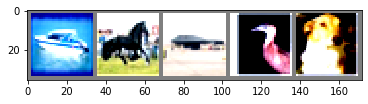

In [0]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [0]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 85 %


In [0]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 90 %
Accuracy of   car : 97 %
Accuracy of  bird : 85 %
Accuracy of   cat : 82 %
Accuracy of  deer : 87 %
Accuracy of   dog : 74 %
Accuracy of  frog : 92 %
Accuracy of horse : 85 %
Accuracy of  ship : 89 %
Accuracy of truck : 96 %
